<a href="https://colab.research.google.com/github/yojulab/learn_data_analytics/blob/main/codes/cases/TimeSerise_SaleOfGoods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### refer : https://blog.naver.com/data_station/222493262626

## Time Series

* 시간에 따른 연속형 변수의 예측 및 Trend 파악
    - 여기서 시간은 특정 간격을 가진 주기 ; Lag
    - Lag에서 Data point의 특성을 찾는것


* 시계열 분석 모형
    - **일변량 정상시계열**
        - ARIMA
        - 지수평활법
    
    - **다변량 시계열**
        - 전이함수모형
* 적용 예 : 시간 따른 매출, 불량, 이탈율 등

* 시계열 패턴 요소
    - 추세 (Trend) : 계절성 (Seasonality), 주기 (Cycle)
    - 대상 : 시간에 따라 독립적인 데이터(White Noise), 통계적, 기술적 분석 가능한 정도

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# mpl.rc('font',family='Malgun Gothic')
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/opentype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/opentype/mathjax: caching, new cache contents: 24 fonts, 0 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 5 dirs
/usr/share/fonts/truetype/font-awesome: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/glyphicons: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 di

In [ ]:
df1 = pd.read_csv('Data11.csv')
df1.shape

(803675, 3)

In [ ]:
df1.head()  # df1.tail()

,구매일,구매금액,물품대분류
0,2018-04-20,57120,기저귀
1,2018-04-20,15900,더블하트
2,2018-04-20,7000,더블하트
3,2018-04-20,20900,더블하트
4,2018-05-06,26500,더블하트


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803675 entries, 0 to 803674
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   구매일     803675 non-null  object
 1   구매금액    803675 non-null  int64 
 2   물품대분류   803675 non-null  object
dtypes: int64(1), object(2)
memory usage: 18.4+ MB


In [ ]:
df1['Datetime'] = pd.to_datetime(df1['구매일'])

In [ ]:
df1['Datetime'].describe() # 판매하지 않은 일 있음 확인

<ipython-input-6-506ef4bcc623>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df1['Datetime'].describe() # 판매하지 않은 일 있음 확인


count                  803675
unique                    589
top       2019-10-11 00:00:00
freq                    10500
first     2018-04-20 00:00:00
last      2020-08-07 00:00:00
Name: Datetime, dtype: object

In [ ]:
df1['Year']= df1['Datetime'].dt.year
df1['Month']= df1['Datetime'].dt.month
df1['Day']= df1['Datetime'].dt.day
df1['day_of_week']= df1['Datetime'].dt.day_name()

## 일자별로 트렌드 확인

<ipython-input-8-747c39fe23d8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df1, x='Datetime' ,y='구매금액', ci=None , estimator=sum)


<Axes: xlabel='Datetime', ylabel='구매금액'>

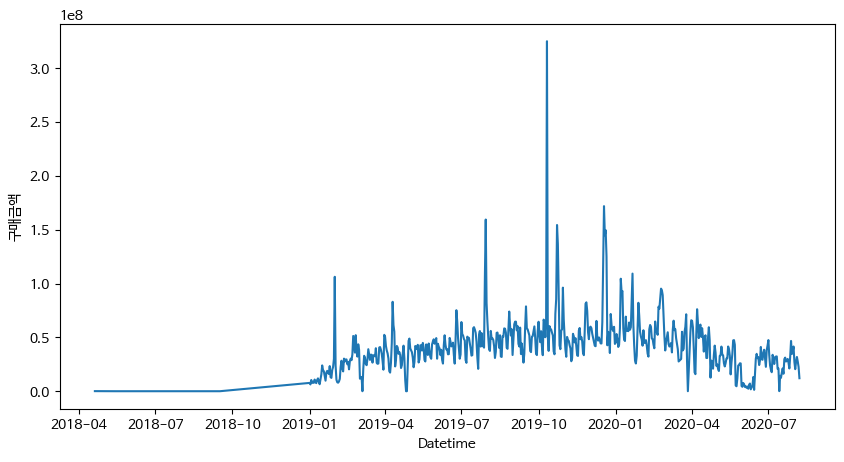

In [ ]:
plt.figure(figsize= [10,5])
sns.lineplot(data=df1, x='Datetime' ,y='구매금액', ci=None , estimator=sum)

#### 좀 더 빠르게 표시

In [ ]:
pivot3 = pd.pivot_table(data=df1, index=['Datetime','물품대분류'], values='구매금액', aggfunc='sum').reset_index()
pivot3.head()

,Datetime,물품대분류,구매금액
0,2018-04-20,기저귀,57120
1,2018-04-20,더블하트,43800
2,2018-05-06,더블하트,26500
3,2018-05-14,FC,20600
4,2018-08-12,더블하트,75700


<Axes: xlabel='Datetime', ylabel='구매금액'>

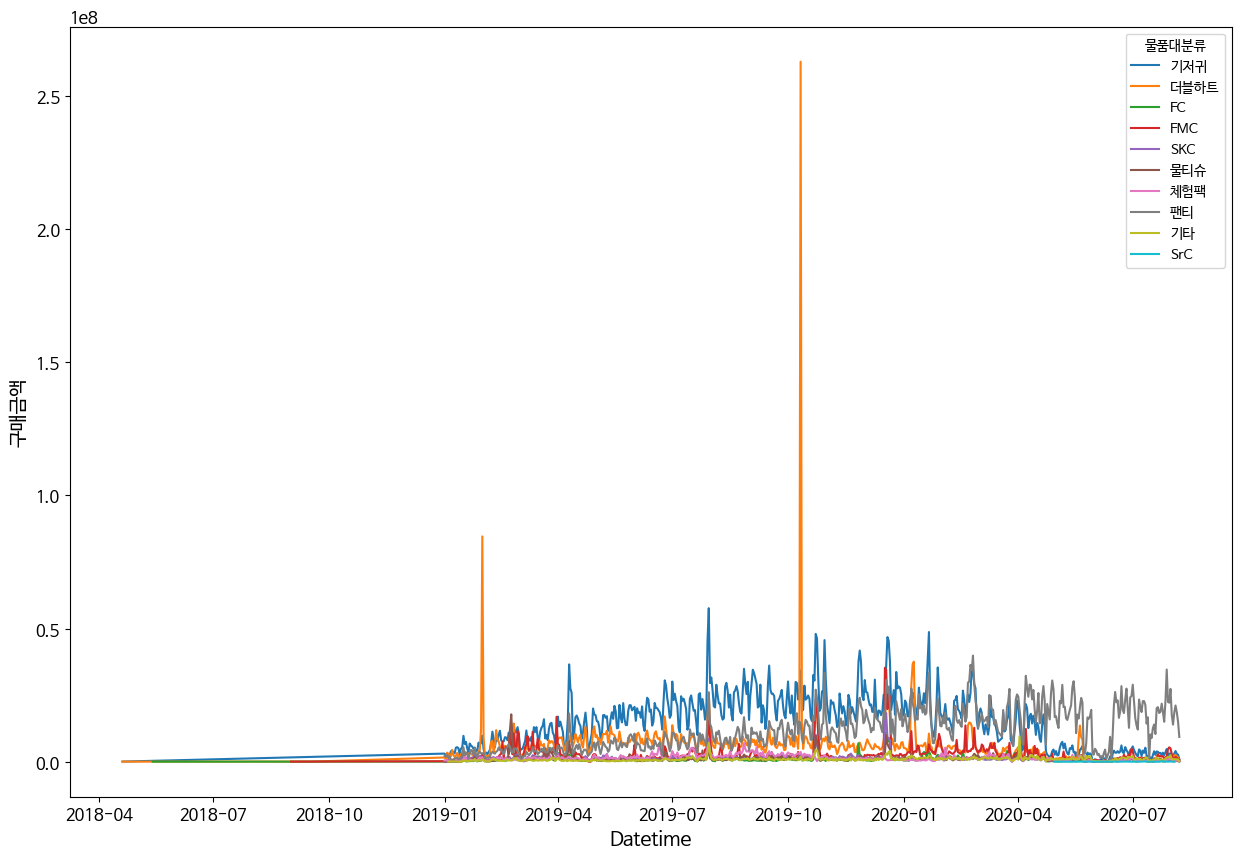

In [ ]:
sns.lineplot(data=pivot3, x='Datetime' ,y='구매금액', hue='물품대분류') # 특정 픽 처리 고려 필요.

##**ARIMA (Auto Regressive Integrated Moving Average Model)**
- refer : https://youtu.be/ZwjMJyA3r5s
* AR (Auto Regressive Model) : 자기회귀모델 / p 시점 전의 자료가 현재 자료에 영향을 주는 자기회귀 모델
    - 자기상관함수 (ACF : Auto Correlation Function)
        - p 구간 내 데이터 사이의 상관관계 (교회 증가 - 범죄 증가 ? -> [인구 증가 고려 필요])
    - 부분자기상관함수 (PACF : Partial Auto Correlation Function) :
        - 다른 시점의 데이터들의 영향을 제외한 두 관측치 사이의 상관관계 (교회 - 범죄 !- [인구])  
    - 일반적인 AR 모델에서는 ACF는 일정히 감소 / PACF가 절단면을 갖는다
    - ACF와 PACF를 확인하여 분석 모델을 선택한다
    
* MA(Moving Average Model) : 일정한 p구간의 데이터들의 평균을 계산하여, 미래를 예측하는 방법
    - 시계열의 불규칙적인 변동을 제거하기 위함

* Difference (차분)
    - 정상성(Stationary)을 만족하지 못하는 시계열 데이터를 정상성이 만족하는 데이터로 변환
- ARIMA 사용 시기 및 조건 : 시계열 모델 중 가장 많이 사용
    - 단기예측에 적합
    - 계절적 변동요인 (주기적 변동요인)
    - 표본의 크기가 최소 50개 이상
    - 정상적(Stationary)자료에 적용 가능
        - 평균이 증가/감소 -> 차분(Difference)을 실시
        - 분산이 증가/감소 -> Lag 변환

### 특정 데이터만 확인(기저귀)

In [ ]:
cond1 = df1['물품대분류'] == '기저귀'
df2 = df1.loc[cond1].iloc[1:]   # 동떨어진 2018년 데이터 제외
df2.head()

,구매일,구매금액,물품대분류,Datetime,Year,Month,Day,day_of_week
29,2019-05-13,59520,기저귀,2019-05-13,2019,5,13,Monday
30,2019-05-10,50640,기저귀,2019-05-10,2019,5,10,Friday
31,2019-06-06,50640,기저귀,2019-06-06,2019,6,6,Thursday
32,2019-07-01,50640,기저귀,2019-07-01,2019,7,1,Monday
33,2019-07-29,101280,기저귀,2019-07-29,2019,7,29,Monday


### 특정 주기 단위로 분할

In [ ]:
df_time = pd.pivot_table(data=df2, index='Datetime', values='구매금액', aggfunc='sum')
df_time.head()

,구매금액
Datetime,
2019-01-01,3051240
2019-01-02,2556280
2019-01-03,2729480
2019-01-04,2238440
2019-01-05,2478680


In [ ]:
y = df_time['구매금액'].resample('1D').mean()
y

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

* 결측치 처리

In [ ]:
y.isnull().sum()  # 없음

0

In [ ]:
y1 = y.fillna( y.mean())  # 있을 시

In [ ]:
y1.shape

(84,)

In [ ]:
y2 = y.fillna( method='ffill' ) # 시계열 데이터 시 방법(ffill 앞 데이터로 채우기)

In [ ]:
y2

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
                ...    
2020-08-03    3075900.0
2020-08-04    4010200.0
2020-08-05    2937800.0
2020-08-06    2647000.0
2020-08-07    1022300.0
Freq: D, Name: 구매금액, Length: 585, dtype: float64

In [ ]:
from pylab import rcParams

In [ ]:
rcParams['figure.figsize'] = 15,10

#차트 기본 크기 설정
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'

In [ ]:
import statsmodels.tsa.api as tsa

* 데이터 분석 가능 여부 : 시계열 분해 (tsa)
    - 시계열에 영향을 주는 일반적 요인을 시계열에서 분리해 분석하는 방법
    - 계절요인 Seasonal
    - 추세요인 Trend
    - 순환요인 Cyclical
    - 불규칙요인 Irregular

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:338: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


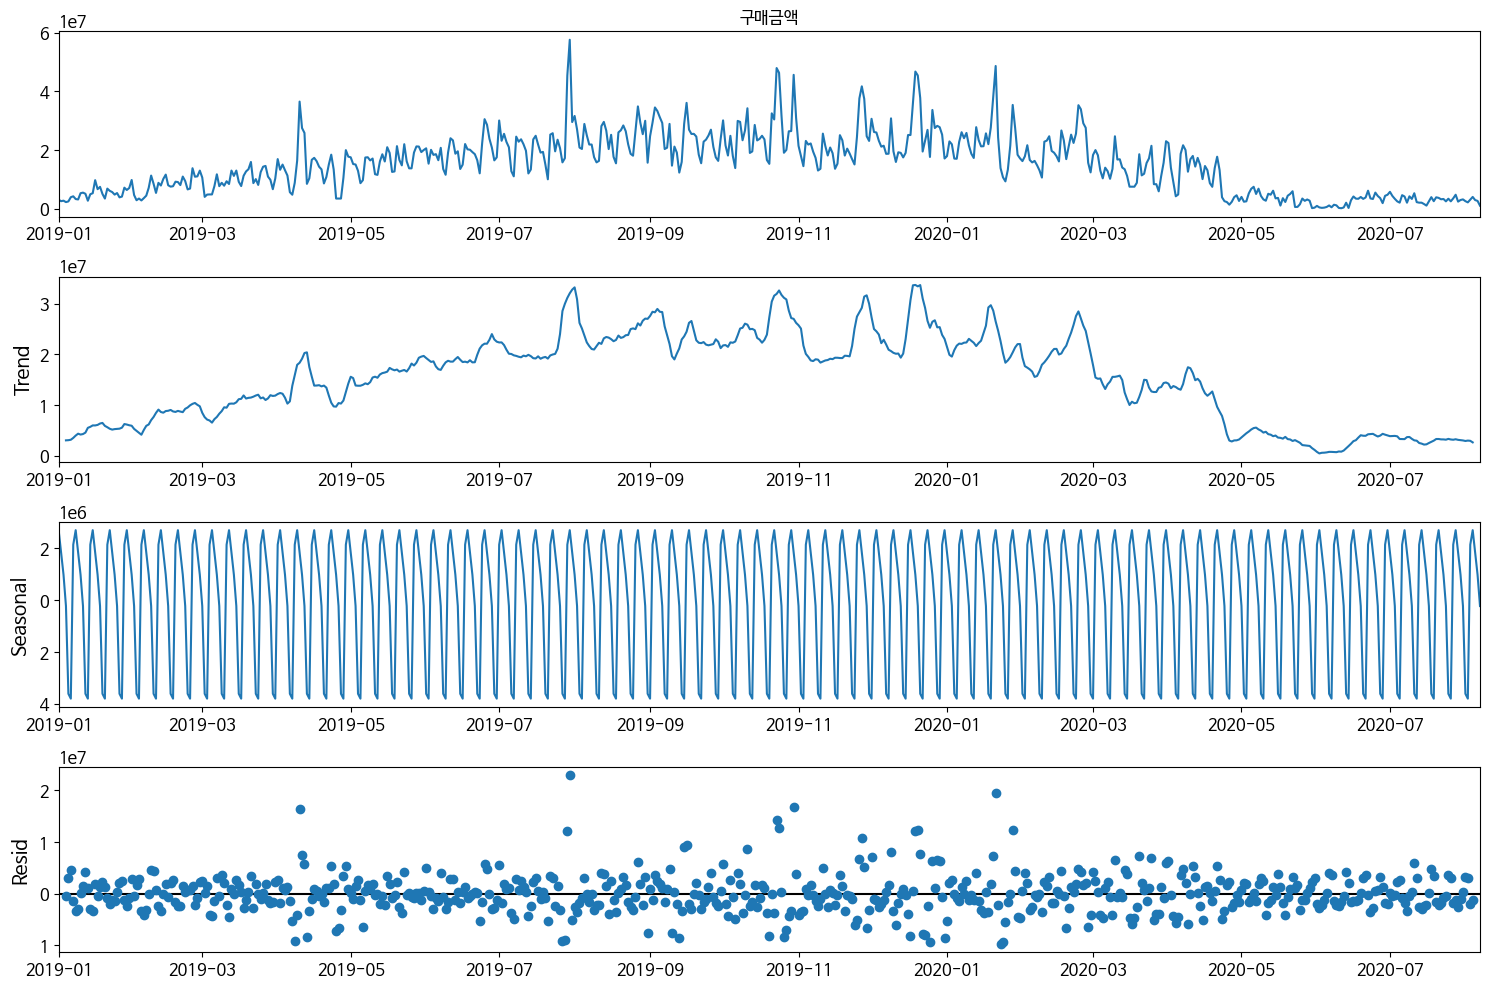

In [ ]:
# https://youtu.be/dvvQUfXRRHU 28:02
model_series = tsa.seasonal_decompose(y2, model='additive') # 최소 레코드가 50 이상
fig = model_series.plot()
plt.show()

### youtube refer : [시계열 데이터 분석 기초 Part.3](https://youtu.be/dvvQUfXRRHU)

In [ ]:
import itertools # 반복수를 만드는 라이브러리

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [ ]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [ ]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = tsa.statespace.SARIMAX(y2,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

In [ ]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list,'AIC':results_AIC_list})
ARIMA_list.to_excel('arima_model_list.xlsx')
ARIMA_list

,Parameter,Seasonal,AIC
0,"(0, 0, 0)","(0, 0, 0, 12)",21187.142381
1,"(0, 0, 0)","(0, 0, 1, 12)",20486.120636
2,"(0, 0, 0)","(0, 1, 0, 12)",19898.386375
3,"(0, 0, 0)","(0, 1, 1, 12)",19300.897479
4,"(0, 0, 0)","(1, 0, 0, 12)",19901.464508
...,...,...,...
59,"(1, 1, 1)","(0, 1, 1, 12)",19011.967429
60,"(1, 1, 1)","(1, 0, 0, 12)",19239.698146
61,"(1, 1, 1)","(1, 0, 1, 12)",19206.115737
62,"(1, 1, 1)","(1, 1, 0, 12)",19159.876822


- **Likelihood (최대우도) : 특정 데이터가 모수로부터 추출되었을 가능도**
    - 특정 값에 대한 분포의 확률 추정 (연속 확률 밀도 함수 pdf의 y값)
    
    
- **AIC (Akaike Information Criterion) : 데이터에 대한 모델의 상대적 품질**
    - AIC = -2 ln(L) + 2k
    - 값이 낮을 수록 모형 적합도가 높은것을 의미
    
    
- **BIC (Bayes Information Criterion)**
    - BIC = -2 ln(L) + log(n)p
    - 변수가 더 많은 경우,  AIC에 더 많은 패널티를 부여해 계산
    
    
- **HQIC (Hannan Quinn Information Criterion)**
    - HQIC = -2 ln(L) + 2k ln(ln(n))

In [ ]:
ARIMA_list.sort_values(by='AIC').head(2)

,Parameter,Seasonal,AIC
43,"(1, 0, 1)","(0, 1, 1, 12)",18983.237154
47,"(1, 0, 1)","(1, 1, 1, 12)",18983.666910


In [ ]:
mod = tsa.statespace.SARIMAX(y2,order=(0, 1, 1),seasonal_order=(0, 1, 1, 12),
                              enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()

In [ ]:
# yotube refer : https://youtu.be/LjE8qQ5i4gg
# print(results.summary().tables[1])
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               구매금액   No. Observations:                  585
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood               -9521.297
Date:                            Sat, 22 Jul 2023   AIC                          19048.594
Time:                                    07:58:01   BIC                          19061.567
Sample:                                01-01-2019   HQIC                         19053.660
                                     - 08-07-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0721      0.063     -1.137      0.256      -0.196       0.052
ma.S.L12      -0.9948      0.022   

- Order (p,d,q), Seasonal Order (P,D,Q,M)
    - p : AR에서의 p값 (p 구간 내 데이터 사이 상관관계)
    - d : 차분
    - q : MA model(이동상관관계모델)에서 PACF 편상관계수 q 값
    - P : 계절성 주기에서 p
    - D : 계절성 여부 (0 or 1)
    - Q : 계절성 반복 주기
    - M : 계절성 주기
    
- Ljung - Box Test : 일정 기간동안 관측치가 랜덤이고, 독립적인지 여부를 검정
    - 귀무 : 데이터가 상관관계를 나타내지 않는다.
    - 대립 : 데이터가 상관관계를 나타낸다.
    - P.value(귀무가설이 참일 확률) < 0.05 (유의수준) -> 대립가설 참  
    
- Jarque Bera Test : 왜도와 첨도가 정규분포와 일치하는지 가설검정
    - SARIMAX : 잔차의 분포가 정규분포 인가
    - 귀무 가설 : 해당 잔차(residual)는 정규분포와 일치한다.
    - 대립 가설 : 해당 잔차(residual)는 정규분포와 일치하지 않는다.
    - P.value < 0.05 , 해당 잔차(residual)는 정규분포와 일치하지 않는다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


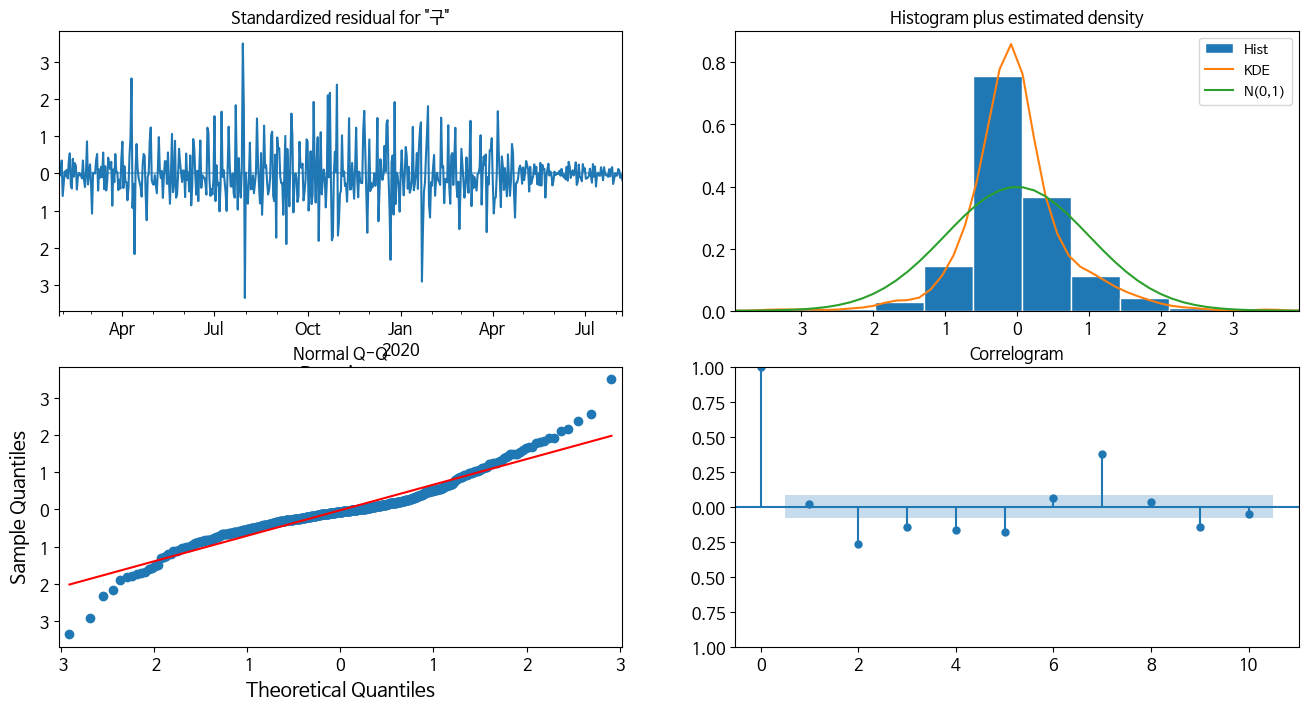

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
results.get_prediction()

In [ ]:
y2.head()

Datetime
2019-01-01    3051240.0
2019-01-02    2556280.0
2019-01-03    2729480.0
2019-01-04    2238440.0
2019-01-05    2478680.0
Freq: D, Name: 구매금액, dtype: float64

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-22'), dynamic=False)
pred_ci = pred.conf_int()

ax = y2.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.legend()
plt.show()

KeyError: ignored

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2018-04-22'), dynamic=False)
pd.DataFrame(pred.predicted_mean).reset_index()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

In [ ]:
pred_uc = results.get_forecast(steps=50)


In [ ]:
pred_uc.predicted_mean

In [ ]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = y2.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)

plt.legend()
plt.show()

In [ ]:
print('Done')